# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 1.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
363000,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0415,0.0928,0.1440,0.0244,0,0,0,0
126905,0.0024,0.0024,0.0513,0.0269,0.0024,0.0024,0.0684,0.0977,0.0024,0.0342,1,1,4,4
118497,0.0049,0.2026,0.0464,0.0024,0.0024,0.0024,0.0635,0.0659,0.1929,0.1587,1,1,3,3
308858,0.0928,0.0610,0.1465,0.1074,0.0073,0.0073,0.2271,0.2124,0.0586,0.0586,6,6,7,7
107934,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0342,0.0024,0.0024,0,0,0,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471483 entries, 0 to 471482
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          471483 non-null  float64
 1   Emg2          471483 non-null  float64
 2   Emg3          471483 non-null  float64
 3   Emg4          471483 non-null  float64
 4   Emg5          471483 non-null  float64
 5   Emg6          471483 non-null  float64
 6   Emg7          471483 non-null  float64
 7   Emg8          471483 non-null  float64
 8   Emg9          471483 non-null  float64
 9   Emg10         471483 non-null  float64
 10  repetition    471483 non-null  int64  
 11  rerepetition  471483 non-null  int64  
 12  stimulus      471483 non-null  int64  
 13  restimulus    471483 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.4 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000
mean,0.129657,0.122672,0.123409,0.044321,0.012722,0.014612,0.221796,0.233414,0.107259,0.072334,3.136047,2.113255,5.562892,4.570513
std,0.286859,0.322911,0.337717,0.167680,0.032359,0.042109,0.476014,0.353467,0.233386,0.156993,3.480664,3.212682,6.575838,6.427040
min,0.002400,0.000000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.012200,0.063500,0.002400,0.009800,0.000000,0.000000,0.000000,0.000000
50%,0.017100,0.002400,0.002400,0.002400,0.002400,0.002400,0.051300,0.112300,0.007300,0.039100,2.000000,0.000000,3.000000,0.000000
75%,0.114700,0.046400,0.058600,0.007300,0.002400,0.002400,0.190400,0.244100,0.136700,0.065900,6.000000,4.000000,10.000000,9.000000
max,4.665500,4.663100,4.658200,4.663100,0.876500,1.484400,4.663100,4.665500,4.660600,4.628900,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     202625
2      15538
12     15532
8      15531
7      15518
4      15516
11     15514
5      15492
9      15492
10     15477
1      15476
3      15469
6      15469
14     10361
13     10360
17     10346
15     10334
16     10320
18      5210
20      5202
19      5189
21      5185
23      5166
22      5161
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.273175,-0.420358,-0.402043,-0.277718,-0.355235,-0.163107,-0.495774,-0.564693,-0.498765,-0.275575
1,-0.304453,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.583680,-0.498765,-0.305083
2,-0.312113,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.589922,-0.498765,-0.334591
3,-0.312113,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.602667,-0.498765,-0.378552
4,-0.335731,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.596424,-0.498765,-0.393607
...,...,...,...,...,...,...,...,...,...,...
378530,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.545445,-0.007433,-0.467075
378531,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.268859,-0.495774,-0.558190,0.012680,-0.467075
378532,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.558190,0.012680,-0.467075
378533,-0.483823,-0.420358,-0.402043,-0.277718,-0.355235,-0.322813,-0.495774,-0.564693,0.022532,-0.467075


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [24]:
num_classes = 24
input_dim = X.shape[1]

In [229]:
from keras.models import Sequential    
model = Sequential()


model.add(Dense(48, input_dim=input_dim, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(96, activation='softmax'))
model.add(BatchNormalization())


model.add(Dense(192, activation='softmax'))
model.add(BatchNormalization())

model.add(Dense(384, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(768, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(24, activation='softmax'))

model.add(Dense(768, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(384, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(192, activation='softmax'))
model.add(BatchNormalization())

model.add(Dense(96, activation='softmax'))
model.add(BatchNormalization())


model.add(Dense(48, activation='relu'))
model.add(BatchNormalization())


model.add(Dense(num_classes, activation='softmax'))

In [230]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_188 (Dense)           (None, 48)                528       
                                                                 
 batch_normalization_144 (Ba  (None, 48)               192       
 tchNormalization)                                               
                                                                 
 dense_189 (Dense)           (None, 96)                4704      
                                                                 
 batch_normalization_145 (Ba  (None, 96)               384       
 tchNormalization)                                               
                                                                 
 dense_190 (Dense)           (None, 192)               18624     
                                                                 
 batch_normalization_146 (Ba  (None, 192)            

# 2. Compile Network

In [231]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [232]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [233]:
history = model.fit(X_train, y_train, batch_size=4056, epochs=300, validation_data = (X_test, y_test))

Epoch 1/300
75/75 [==============================] - 3s 22ms/step - loss: 1.5396 - accuracy: 0.6187 - val_loss: 2.8676 - val_accuracy: 0.5284
Epoch 2/300
75/75 [==============================] - 1s 18ms/step - loss: 1.0007 - accuracy: 0.7367 - val_loss: 2.6290 - val_accuracy: 0.5284
Epoch 3/300
75/75 [==============================] - 1s 18ms/step - loss: 0.8058 - accuracy: 0.7830 - val_loss: 2.4518 - val_accuracy: 0.5284
Epoch 4/300
75/75 [==============================] - 1s 18ms/step - loss: 0.7039 - accuracy: 0.8073 - val_loss: 2.3534 - val_accuracy: 0.5284
Epoch 5/300
75/75 [==============================] - 1s 18ms/step - loss: 0.6333 - accuracy: 0.8243 - val_loss: 2.2433 - val_accuracy: 0.5284
Epoch 6/300
75/75 [==============================] - 1s 18ms/step - loss: 0.5835 - accuracy: 0.8364 - val_loss: 2.1961 - val_accuracy: 0.5284
Epoch 7/300
75/75 [==============================] - 1s 18ms/step - loss: 0.5433 - accuracy: 0.8460 - val_loss: 2.1615 - val_accuracy: 0.5284
Epoch 

75/75 [==============================] - 1s 19ms/step - loss: 0.2067 - accuracy: 0.9403 - val_loss: 0.3183 - val_accuracy: 0.9152
Epoch 59/300
75/75 [==============================] - 1s 18ms/step - loss: 0.2030 - accuracy: 0.9416 - val_loss: 0.3125 - val_accuracy: 0.9151
Epoch 60/300
75/75 [==============================] - 1s 19ms/step - loss: 0.2083 - accuracy: 0.9397 - val_loss: 0.3054 - val_accuracy: 0.9174
Epoch 61/300
75/75 [==============================] - 1s 18ms/step - loss: 0.1972 - accuracy: 0.9433 - val_loss: 0.3127 - val_accuracy: 0.9168
Epoch 62/300
75/75 [==============================] - 1s 18ms/step - loss: 0.1990 - accuracy: 0.9426 - val_loss: 0.3101 - val_accuracy: 0.9184
Epoch 63/300
75/75 [==============================] - 1s 18ms/step - loss: 0.2011 - accuracy: 0.9421 - val_loss: 0.3022 - val_accuracy: 0.9191
Epoch 64/300
75/75 [==============================] - 1s 19ms/step - loss: 0.1951 - accuracy: 0.9436 - val_loss: 0.3284 - val_accuracy: 0.9176
Epoch 65/300

75/75 [==============================] - 1s 18ms/step - loss: 0.1489 - accuracy: 0.9571 - val_loss: 0.3601 - val_accuracy: 0.8974
Epoch 116/300
75/75 [==============================] - 1s 19ms/step - loss: 0.1527 - accuracy: 0.9559 - val_loss: 0.2938 - val_accuracy: 0.9279
Epoch 117/300
75/75 [==============================] - 1s 19ms/step - loss: 0.1465 - accuracy: 0.9582 - val_loss: 0.2901 - val_accuracy: 0.9291
Epoch 118/300
75/75 [==============================] - 1s 18ms/step - loss: 0.1476 - accuracy: 0.9574 - val_loss: 0.2891 - val_accuracy: 0.9291
Epoch 119/300
75/75 [==============================] - 1s 18ms/step - loss: 0.1485 - accuracy: 0.9578 - val_loss: 0.2949 - val_accuracy: 0.9285
Epoch 120/300
75/75 [==============================] - 1s 19ms/step - loss: 0.1501 - accuracy: 0.9571 - val_loss: 0.2875 - val_accuracy: 0.9299
Epoch 121/300
75/75 [==============================] - 1s 19ms/step - loss: 0.1498 - accuracy: 0.9570 - val_loss: 0.2908 - val_accuracy: 0.9291
Epoch 

Epoch 172/300
75/75 [==============================] - 1s 20ms/step - loss: 0.1239 - accuracy: 0.9646 - val_loss: 0.2885 - val_accuracy: 0.9317
Epoch 173/300
75/75 [==============================] - 2s 20ms/step - loss: 0.1221 - accuracy: 0.9652 - val_loss: 0.3138 - val_accuracy: 0.9286
Epoch 174/300
75/75 [==============================] - 1s 19ms/step - loss: 0.1272 - accuracy: 0.9634 - val_loss: 0.2983 - val_accuracy: 0.9328
Epoch 175/300
75/75 [==============================] - 1s 19ms/step - loss: 0.1204 - accuracy: 0.9654 - val_loss: 0.2780 - val_accuracy: 0.9354
Epoch 176/300
75/75 [==============================] - 1s 18ms/step - loss: 0.1231 - accuracy: 0.9647 - val_loss: 0.2922 - val_accuracy: 0.9336
Epoch 177/300
75/75 [==============================] - 1s 19ms/step - loss: 0.1190 - accuracy: 0.9659 - val_loss: 0.2886 - val_accuracy: 0.9337
Epoch 178/300
75/75 [==============================] - 1s 19ms/step - loss: 0.1217 - accuracy: 0.9653 - val_loss: 0.3219 - val_accuracy:

Epoch 229/300
75/75 [==============================] - 1s 18ms/step - loss: 0.1079 - accuracy: 0.9690 - val_loss: 0.3061 - val_accuracy: 0.9359
Epoch 230/300
75/75 [==============================] - 1s 18ms/step - loss: 0.1059 - accuracy: 0.9693 - val_loss: 0.3022 - val_accuracy: 0.9355
Epoch 231/300
75/75 [==============================] - 1s 18ms/step - loss: 0.1091 - accuracy: 0.9685 - val_loss: 0.2892 - val_accuracy: 0.9368
Epoch 232/300
75/75 [==============================] - 1s 17ms/step - loss: 0.1065 - accuracy: 0.9695 - val_loss: 0.3031 - val_accuracy: 0.9344
Epoch 233/300
75/75 [==============================] - 1s 18ms/step - loss: 0.1037 - accuracy: 0.9702 - val_loss: 0.3040 - val_accuracy: 0.9361
Epoch 234/300
75/75 [==============================] - 1s 18ms/step - loss: 0.1066 - accuracy: 0.9694 - val_loss: 0.3224 - val_accuracy: 0.9265
Epoch 235/300
75/75 [==============================] - 1s 17ms/step - loss: 0.1038 - accuracy: 0.9703 - val_loss: 0.2925 - val_accuracy:

Epoch 286/300
75/75 [==============================] - 1s 18ms/step - loss: 0.0952 - accuracy: 0.9726 - val_loss: 0.3211 - val_accuracy: 0.9343
Epoch 287/300
75/75 [==============================] - 1s 18ms/step - loss: 0.0992 - accuracy: 0.9714 - val_loss: 0.2973 - val_accuracy: 0.9379
Epoch 288/300
75/75 [==============================] - 1s 18ms/step - loss: 0.0969 - accuracy: 0.9719 - val_loss: 0.3045 - val_accuracy: 0.9355
Epoch 289/300
75/75 [==============================] - 1s 18ms/step - loss: 0.0967 - accuracy: 0.9719 - val_loss: 0.3136 - val_accuracy: 0.9340
Epoch 290/300
75/75 [==============================] - 1s 18ms/step - loss: 0.0989 - accuracy: 0.9712 - val_loss: 0.2993 - val_accuracy: 0.9377
Epoch 291/300
75/75 [==============================] - 1s 19ms/step - loss: 0.0949 - accuracy: 0.9725 - val_loss: 0.3290 - val_accuracy: 0.9330
Epoch 292/300
75/75 [==============================] - 1s 18ms/step - loss: 0.0949 - accuracy: 0.9729 - val_loss: 0.2986 - val_accuracy:

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

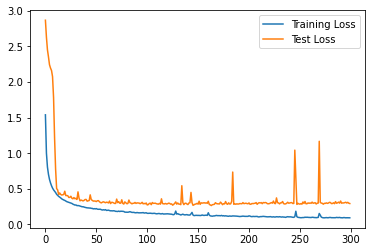

In [234]:
#Loss Curve
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = "Test Loss")
plt.legend()
plt.show()

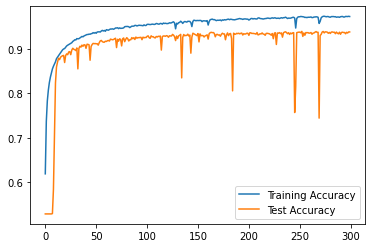

In [235]:
#accuracy Curve
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = "Test Accuracy")
plt.legend()
plt.show()

## 4.2 Evaluation

In [236]:
loss, accuracy = model.evaluate(X_test, y_test)

2366/2366 [==============================] - 8s 3ms/step - loss: 0.2941 - accuracy: 0.9382


##  4.3 Make Predictions

In [237]:
predictions = model.predict(X_test)

In [238]:
predictions

array([[9.9712902e-01, 9.0814729e-07, 5.4093813e-05, ..., 3.1018078e-07,
        1.8644353e-06, 5.1291418e-06],
       [8.5135831e-12, 1.0767393e-11, 1.7071107e-11, ..., 6.9297179e-10,
        2.1535147e-09, 3.5390329e-08],
       [8.9415443e-01, 4.0513161e-03, 6.2962365e-04, ..., 1.1977407e-07,
        8.1753555e-08, 2.8368721e-08],
       ...,
       [5.1982457e-08, 6.1490196e-10, 6.0992393e-09, ..., 3.8374184e-14,
        5.6911041e-13, 7.2799633e-13],
       [9.7800714e-01, 2.0131213e-04, 1.0536153e-02, ..., 7.6808220e-07,
        6.8981228e-07, 2.2936670e-06],
       [3.8685513e-13, 7.6024759e-10, 8.4630202e-08, ..., 5.6759976e-08,
        4.1493369e-09, 2.6538194e-12]], dtype=float32)